# Resources:
- http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

In [1]:
%run setup_env.py


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms.regressions.softmax import SoftmaxRegression
from algorithms.utils import plot_loss_history

In [3]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X.shape, X[0].shape

((150, 4), (4,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [18]:
model = SoftmaxRegression()
model.fit(X_train, y_train, epochs=10000, num_classes=3,batch_size=X.shape[0]//10)

Epoch 1/10000 => Loss: 21.8439095062186
Epoch 2/10000 => Loss: 21.154501602811532
Epoch 3/10000 => Loss: 18.140800311372026
Epoch 4/10000 => Loss: 16.140186612137185
Epoch 5/10000 => Loss: 14.746069242118729
Epoch 6/10000 => Loss: 13.808042645161862
Epoch 7/10000 => Loss: 13.090221709708342
Epoch 8/10000 => Loss: 12.553814357780336
Epoch 9/10000 => Loss: 12.102794503524198
Epoch 10/10000 => Loss: 11.69470040909772
Epoch 11/10000 => Loss: 11.315427807875745
Epoch 12/10000 => Loss: 10.955686414492305
Epoch 13/10000 => Loss: 10.610278214869966
Epoch 14/10000 => Loss: 10.275565931301145
Epoch 15/10000 => Loss: 9.948982238273427
Epoch 16/10000 => Loss: 9.628599124025502
Epoch 17/10000 => Loss: 9.312936337152184
Epoch 18/10000 => Loss: 9.000840196446763
Epoch 19/10000 => Loss: 8.691410169732851
Epoch 20/10000 => Loss: 8.383952631598289
Epoch 21/10000 => Loss: 8.077953559026398
Epoch 22/10000 => Loss: 7.773067691054422
Epoch 23/10000 => Loss: 7.469126287296585
Epoch 24/10000 => Loss: 7.166168

In [19]:
predictions = model.predict(X_train)
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

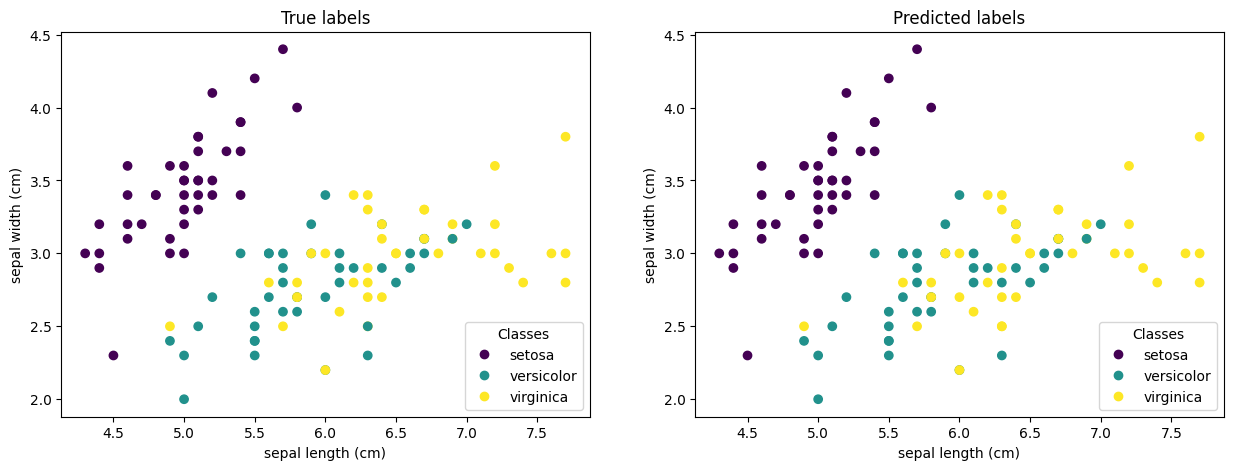

In [21]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
scatter = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="True labels")
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

scatter2 = ax[1].scatter(X_train[:, 0], X_train[:, 1], c=predictions)
ax[1].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="Predicted labels")
_ = ax[1].legend(
    scatter2.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# Performing testing

In [22]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

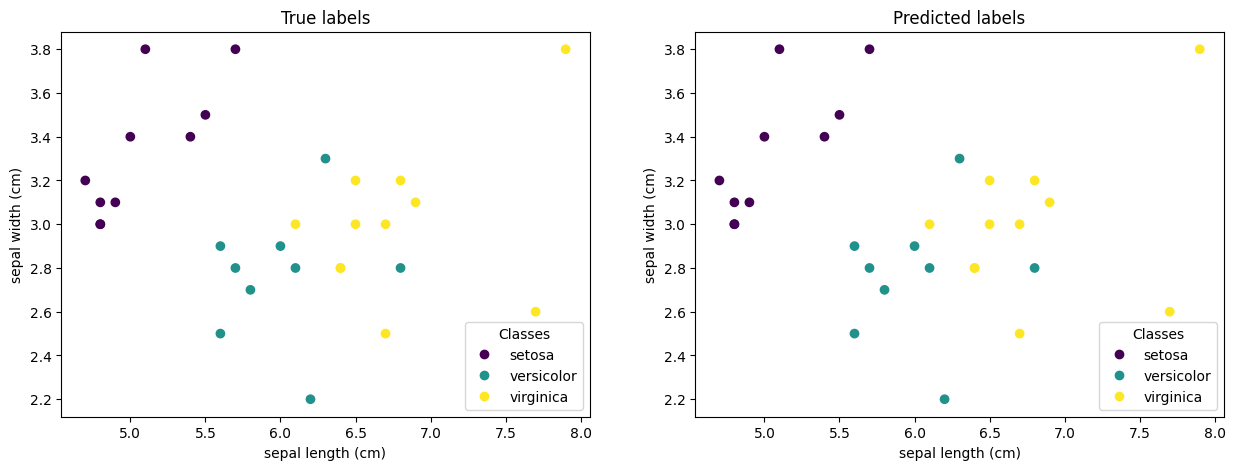

In [23]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
scatter = ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="True labels")
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

scatter2 = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions)
ax[1].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="Predicted labels")
_ = ax[1].legend(
    scatter2.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

The validation works good :)

In [24]:
weights = model.w
print(weights)

[[ 3.16009246  0.55979569 -2.13922361]
 [ 6.06643931  1.72812423 -5.51082754]
 [-6.81578764  0.9973798   7.54359308]
 [-3.44695277 -3.98717774  8.46920594]
 [ 1.32890887  7.56453658 -8.01158312]]
